In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Dataset**

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:06<00:00, 26.0MB/s]
100% 163M/163M [00:06<00:00, 26.5MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
#os.listdir() contains all the file name present in the file name in the folder
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5]) # prints 1st first 5 files present in the list

['with_mask_1523.jpg', 'with_mask_1806.jpg', 'with_mask_1313.jpg', 'with_mask_2796.jpg', 'with_mask_995.jpg']


In [7]:
type(with_mask_files)

list

In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5]) # prints 1st first 5 files present in the list

['without_mask_3287.jpg', 'without_mask_1525.jpg', 'without_mask_2181.jpg', 'without_mask_3278.jpg', 'without_mask_1015.jpg']


In [9]:
# checking if data is imbalanced or balanced
print('Number of with mask image', len(with_mask_files))
print('Number of without mask image', len(without_mask_files))

#dataset is almost balanced

Number of with mask image 3725
Number of without mask image 3828


**Creating Labels for 2 class of images**

1.   with mask --> 1
2.   without mask --> 0



In [10]:
# performing label encoding for with and without mask
with_mask_labels =[1]*len(with_mask_files)

without_mask_labels =[0]*len(without_mask_files)

In [11]:
# printing 1st five values of labels
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

# printing number of items present
print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [12]:
# combining both the list of labels into single list
labels = with_mask_labels + without_mask_labels

print(len(labels))

7553


**Displaying the images**

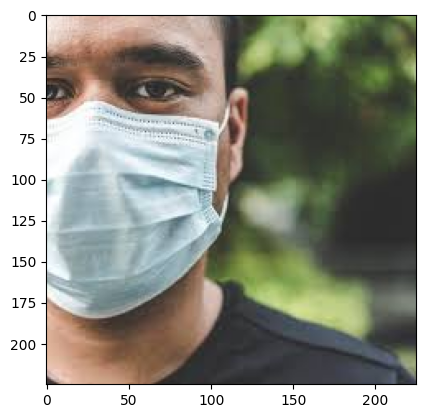

In [13]:
# displaying the with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2435.jpg')
imgplot = plt.imshow(img)
plt.show()

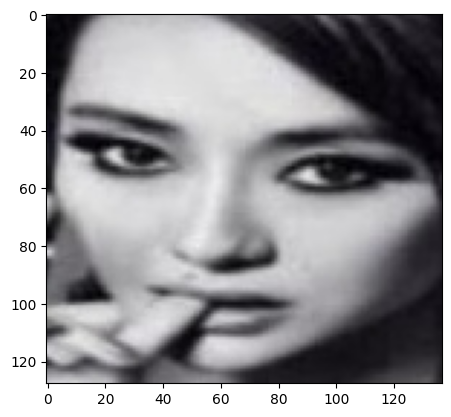

In [14]:
# displaying the with mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3733.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Preprocessing**
*  As we can see that images are of not same dimension so we have to resize all the images to same dimension

*   We have to convert the images into numpy arrays

*   As there are coloured and b/w images so we have to use RGB channels (imp point for interview)


In [15]:
# convert images into numpy array
with_mask_path= '/content/data/with_mask/' #here forward slash / is necessary bcoz file name will be added there when we will run the loop

data=[] #empty list to contain the converted files

for i in with_mask_files:                      # here every image file present in the with mask folder
    image = Image.open(with_mask_path + i)     # will be added to image path Ex: /content/data/with_mask/with_mask_2435.jpg
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# same process needs to be done for without mask and append that in same data list
without_mask_path = '/content/data/without_mask/'
for i in without_mask_files:
    image = Image.open(without_mask_path + i)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
data[0]

array([[[216, 237, 249],
        [224, 243, 251],
        [230, 248, 248],
        ...,
        [  7,  46,  83],
        [  7,  49,  89],
        [  7,  51,  93]],

       [[219, 236, 248],
        [226, 243, 249],
        [234, 251, 250],
        ...,
        [  3,  49,  87],
        [  2,  51,  92],
        [  4,  54,  96]],

       [[221, 238, 251],
        [227, 244, 252],
        [231, 249, 251],
        ...,
        [  4,  54,  94],
        [  4,  57, 100],
        [  3,  59, 103]],

       ...,

       [[ 81, 147, 217],
        [ 79, 148, 213],
        [ 80, 150, 213],
        ...,
        [ 13,  54,  95],
        [ 12,  44,  89],
        [ 18,  42,  92]],

       [[ 64, 132, 207],
        [ 61, 134, 201],
        [ 59, 137, 199],
        ...,
        [  2,  59,  92],
        [  5,  61,  95],
        [ 20,  77, 114]],

       [[ 46, 121, 194],
        [ 46, 122, 190],
        [ 46, 124, 187],
        ...,
        [ 17,  93, 128],
        [ 32, 109, 144],
        [ 59, 141, 175]]

In [17]:
print(len(data))
print(type(data[0]))
print(data[0].shape)

7553
<class 'numpy.ndarray'>
(128, 128, 3)


In [18]:
# converting image list and label listinto numpy array
X = np.array(data)
Y = np.array(labels)

In [19]:
print(type(X))
print(type(Y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train test split**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


**We have to scale our image data between 0 to 1**
data scaling is important as it enhances the models training

In [23]:
# min-max scaler
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building Convolutional Neural Network**

In [24]:
import tensorflow as tf
from tensorflow import keras
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [25]:
"""num_of_classes = 2   #its binary classification so 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))  #dropout work as regularizer


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #output layer """"

SyntaxError: ignored

In [ ]:
"""# Compile the neural network
model.compile( optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
"""# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split= 0.1, epochs = 5)

**Model Evalution**

In [ ]:
"""loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
""""h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Training with VGG 16**

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=X_train_scaled[0].shape)

# Create a new model
model = Sequential()

# Add VGG16 base model
model.add(base_model)

# Flatten the output
model.add(Flatten())

# Add custom layers
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



58889256/58889256 [==============================] - 3s 0us/step


In [27]:
from tensorflow.keras.utils import to_categorical

# Assuming Y_train contains your original labels
# One-hot encode the labels
Y_train_one_hot = to_categorical(Y_train, num_classes=2)

# Now, you can use Y_train_one_hot for training
new = model.fit(X_train_scaled, Y_train_one_hot, validation_split=0.1, epochs=5)


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
170/170 [==============================] - 57s 230ms/step - loss: 0.2408 - accuracy: 0.9066 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 2/5
170/170 [==============================] - 36s 215ms/step - loss: 0.1091 - accuracy: 0.9627 - val_loss: 0.0632 - val_accuracy: 0.9752
Epoch 3/5
170/170 [==============================] - 36s 212ms/step - loss: 0.0795 - accuracy: 0.9704 - val_loss: 0.0802 - val_accuracy: 0.9669
Epoch 4/5
170/170 [==============================] - 37s 217ms/step - loss: 0.0654 - accuracy: 0.9752 - val_loss: 0.0663 - val_accuracy: 0.9736
Epoch 5/5
170/170 [==============================] - 37s 216ms/step - loss: 0.0501 - accuracy: 0.9800 - val_loss: 0.0646 - val_accuracy: 0.9736


In [28]:
Y_test_one_hot = to_categorical(Y_test, num_classes=2)

In [29]:
Y_train_one_hot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [30]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test_one_hot)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 4s 85ms/step - loss: 0.0879 - accuracy: 0.9742
Test Accuracy = 0.974189281463623


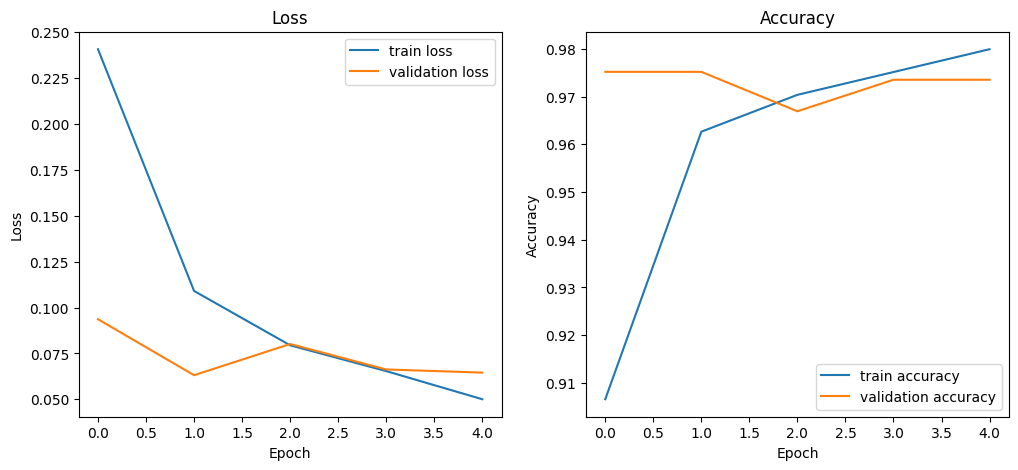

In [31]:
import matplotlib.pyplot as plt

# Access the history object
history = new

# Plot the loss value
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy value
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Path of the image to be predicted: /content/Mukul.jpg


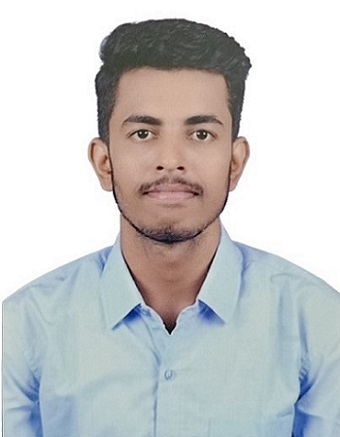

1/1 [==============================] - 1s 584ms/step
[[9.99884129e-01 1.06460335e-04]]
0
The person in the image is not wearing a mask


In [32]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [33]:
model.save('facemask.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
